In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model
import matplotlib as mpl

In [2]:
data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')
a = np.arange(2000,2018)
pop = [str(i)+'Pop' for i in a]
investment = [str(i)+'总投资金额(M)' for i in a]
inv_times = [str(i)+'总投资次数' for i in a]
gdp = [str(i)+'GDP' for i in a]
city=data['City'].drop_duplicates().values###获取城市
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题

In [3]:
def avglogZipfM(data,name1,cname,i):###横轴为排名，纵轴为投资金额或投资次数
    data1=data.fillna(0)
    inv=data1[name1[i]].values###得到投资金额或投资次数对的排名
    city=data['City'].drop_duplicates().values
    cp=dict(zip(city,inv))###dic(city,money/times)
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
    y=[]
    x=[]
    cityName=[]
    for i in range(len(city)):
        if np.log10(cpSortList[i][1]) > 0:
            y.append(cpSortList[i][1])
            x.append(i)
            cityName.append(city[i])
    avgx=np.mean(x)###均值
    avgy=np.mean(y)
    X=np.log10(x/avgx)
    Y=np.log10(y/avgy)
    return(X,Y)

In [4]:
###########最小二乘拟合########3
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def picNH(Yt1,Yt2,num):
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        elif Yt1[i]<num:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)


In [5]:
def picNH2(Yt1,Yt2,num,num2):###主要是GDP要用
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        elif Yt1[i]<num and Yt1[i]>num2:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


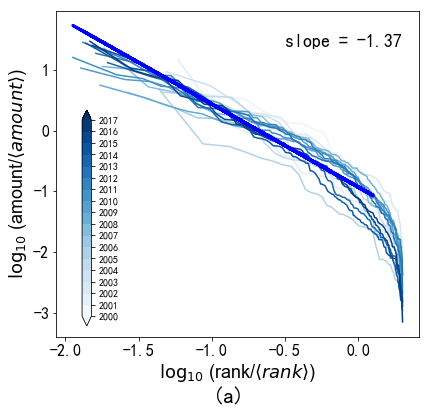

In [57]:
#### Amount 均值
fig=plt.figure(figsize=(6.5,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
###设置颜色
cm1 = list(sns.color_palette("Blues", 18))###蓝色

# plt.figure(figsize=(27,14))
# plt.subplot(231)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = avglogZipfM(data,investment,'amount',i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    plt.plot(YT_A[0],YT_A[1],color=cm1[i])
nh_A = picNH(zip_Ax,zip_Ay,0.1)###得到拟合结果
plt.plot(nh_A[1],nh_A[2],color='blue',linewidth=3)
plt.text(-0.5, 1.37, 'slope = {}'.format("%.2f" % nh_A[0]),size=18)
plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
plt.ylabel('$\log_{10}$'+' (amount'+'/'+r'$\langle {} \rangle$'.format('amount')+')',font2)
plt.text(-1,-4.5,'(a)',fontsize=22)
cmap = mpl.cm.Blues###画颜色条
ax1 = fig.add_axes([0.18, 0.15, 0.02, 0.5]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_a(zipfAmount).pdf', bbox_inches='tight')
# plt.text(-7,1.6,'(a)',fontsize=22)
plt.savefig('E:/0论文/2picture/4_2a.png',dpi=500, bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


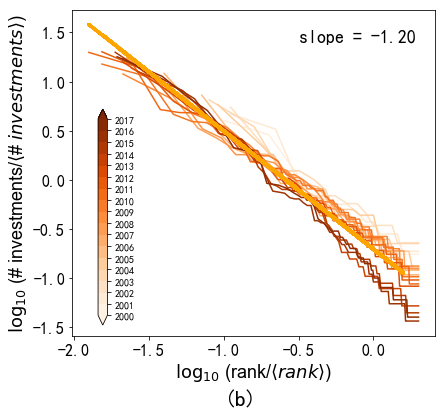

In [54]:
fig=plt.figure(figsize=(6.5,6))
plt.tick_params(labelsize=16) #刻度字体大小16
cm2 = list(sns.color_palette("Oranges", 18))###huang色
for i in range(len(inv_times)):
    YT_T=avglogZipfM(data,inv_times,'times',i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    plt.plot(YT_T[0],YT_T[1],color=cm2[i],alpha=1)
nh_T = picNH(zip_Tx,zip_Ty,0.2)###得到拟合结果
plt.plot(nh_T[1],nh_T[2],color='orange',linewidth=3)
plt.text(-0.5, 1.4, 'slope = {}'.format("%.2f" % nh_T[0]),size=18)
plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
# plt.ylabel('$\log_{10}$'+' (# investments'+'/'+r'$\langle {} \rangle$'.format(r'inveatments')+')',font2)  
plt.ylabel('$\log_{10}$'+' (# investments'+'/'+r'$\langle {} $'.format('')+'# '+r'$ {} \rangle$'.format(r'investments')+')',font2) 
plt.text(-1,-2.3,'(b)',fontsize=22)
cmap = mpl.cm.Oranges###画颜色条
ax2 = fig.add_axes([0.18, 0.15, 0.02, 0.5]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_b(zipfTimes).pdf', bbox_inches='tight')
# plt.text(-7,1.6,'(b)',fontsize=22)
plt.savefig('E:/0论文/2picture/4_2b.png',dpi=500, bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


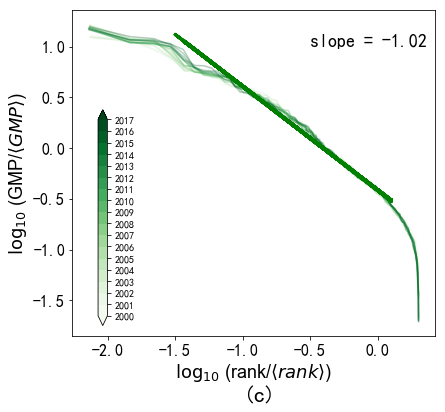

In [50]:
fig=plt.figure(figsize=(6.5,6))
plt.tick_params(labelsize=16) #刻度字体大小13
cm3 = list(sns.color_palette("Greens", 18))###huang色
for i in range(len(inv_times)):
    YT_G=avglogZipfM(data,gdp,'GDP',i)
    zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
    zip_Gy.extend(YT_G[1])
    plt.plot(YT_G[0],YT_G[1],color=cm3[i],alpha=0.3)
nh_G = picNH2(zip_Gx,zip_Gy,0.1,-1.5)###得到拟合结果
plt.plot(nh_G[1],nh_G[2],color='green',linewidth=3,alpha=1)
plt.text(-0.5, 1, 'slope = {}'.format("%.2f" % nh_G[0]),size=18)
plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
plt.ylabel('$\log_{10}$'+' (GMP'+'/'+r'$\langle {} \rangle$'.format('GMP')+')',font2)
plt.text(-1,-2.5,'(c)',fontsize=22)
# fig = plt.figure(figsize=(3, 8))
cmap = mpl.cm.Greens###画颜色条
ax3 = fig.add_axes([0.18, 0.15, 0.02, 0.5]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb3 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_c(zipfGDP).pdf', bbox_inches='tight')
# plt.text(-7,1.6,'(c)',fontsize=22)
plt.savefig('E:/0论文/2picture/4_2c.png',dpi=500, bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10


D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10


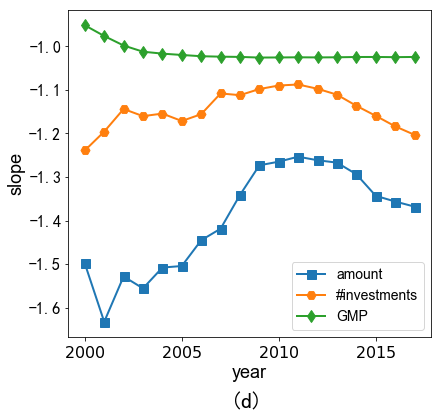

In [47]:
#### 查看2000-2017年zipf拟合结果
from matplotlib.ticker import FuncFormatter   ### 今天的主角
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % x
fig=plt.figure(figsize=(6.5,6))
ax1=fig.add_subplot(111)
formatter = FuncFormatter(formatnum)
ax1.xaxis.set_major_formatter(formatter)
# plt.figure(figsize=(8,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
nhA=[]####保存17年间的拟合结果
nhT=[]
nhG=[]
x=np.arange(2000,2018)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 14,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = avglogZipfM(data,investment,'amount',i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    nhA.append(picNH(zip_Ax,zip_Ay,0.1)[0])
    
    YT_T=avglogZipfM(data,inv_times,'times',i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    nhT.append(picNH(zip_Tx,zip_Ty,0.2)[0])
    
    YT_G=avglogZipfM(data,gdp,'GDP',i)
    zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
    zip_Gy.extend(YT_G[1])
    nhG.append(picNH2(zip_Gx,zip_Gy,0.1,-1.5)[0])
plt.plot(x,nhA,linewidth=2,label='amount',marker='s',markersize=9)
plt.plot(x,nhT,linewidth=2,label='#investments',marker='H',markersize=9)
plt.plot(x,nhG,linewidth=2,label='GMP',marker='d',markersize=9)
plt.xlabel('year',font2)
plt.ylabel('slope',font2)
plt.legend(prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/Fig5_d(zipfSlope).pdf', bbox_inches='tight')
# plt.text(2000-2.5,-0.89,'(d)',fontsize=22)
plt.text(2007.5,-1.83,'(d)',fontsize=22)
plt.savefig('E:/0论文/2picture/4_2d.png',dpi=500, bbox_inches='tight')

In [10]:
### 将zipf拟合值保存下来，跟scaling law做对比
dfzipf = pd.DataFrame()
dfzipf['zipfAmount'] = nhA
dfzipf['zipfTimes'] = nhT
dfzipf['zipfGMP'] = nhG
dfzipf.to_excel('E:/vcdata/pic/picSC/zipfClass.xlsx')

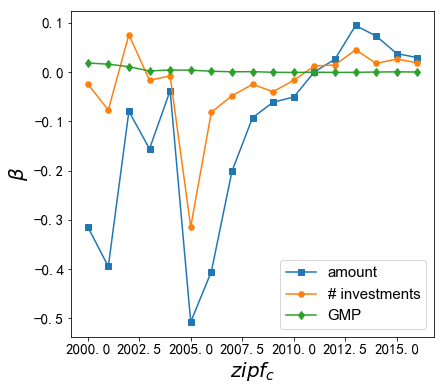

In [17]:
########### zipf 原始数据图 ###############33

In [10]:
def zipfM(data,name1,cname,i):###横轴为排名，纵轴为投资金额或投资次数
    data1=data.fillna(0)
    inv=data1[name1[i]].values###得到投资金额或投资次数对的排名
    city=data['City'].drop_duplicates().values
    cp=dict(zip(city,inv))###dic(city,money/times)
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
    y=[]
    x=[]
    cityName=[]
    font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
    
    for i in range(len(city)):
        if cpSortList[i][1]!=0.0:
            y.append(cpSortList[i][1])
            x.append(i)
            cityName.append(city[i])
    return(x,y)

In [11]:
####取log后的数据
def logZipfM(data,name1,cname,i):###横轴为排名，纵轴为投资金额或投资次数
    data1=data.fillna(0)
    inv=data1[name1[i]].values###得到投资金额或投资次数对的排名
    city=data['City'].drop_duplicates().values
    cp=dict(zip(city,inv))###dic(city,money/times)
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
    y=[]
    x=[]
    cityName=[]
    for i in range(len(city)):
        if np.log10(cpSortList[i][1]) > 0:
            y.append(np.log10(cpSortList[i][1]))
            x.append(np.log10(i))
            cityName.append(city[i])
    return(x,y)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


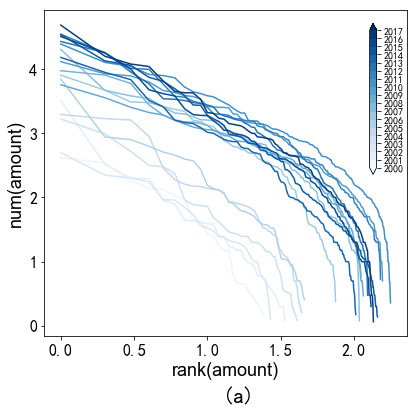

In [37]:
#### Amount 均值
fig=plt.figure(figsize=(6.5,6))
###设置颜色
cm1 = list(sns.color_palette("Blues", 18))###蓝色

# plt.figure(figsize=(27,14))
# plt.subplot(231)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A1 = logZipfM(data,investment,'amount',i)
    plt.plot(YT_A1[0],YT_A1[1],color=cm1[i])
# plt.text(-0.2, 1.3, 'slope = {}'.format("%.2f" % nh_A[0]),size=16)
plt.xlabel('rank(amount)',font2)
plt.ylabel('num(amount)',font2)
plt.text(1.1,-1.2,'(a)',fontsize=22)
cmap = mpl.cm.Blues###画颜色条
ax1 = fig.add_axes([0.82, 0.5, 0.015, 0.35]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_ea(logzipfAmount).pdf', bbox_inches='tight')
# plt.text(-53,1.2,'(a)',fontsize=22)
plt.savefig('E:/0论文/2picture/4_1a.png',dpi=500, bbox_inches='tight')

In [14]:
pow(1,-2)/pow(2,-2),pow(1,-1.18)/pow(2,-1.18)

(4.0, 2.265767770591597)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


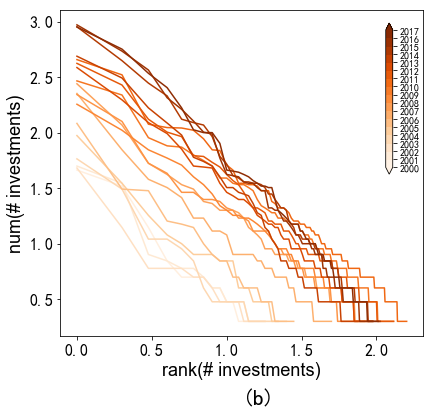

In [33]:
#### Amount 均值
fig=plt.figure(figsize=(6.5,6))
###设置颜色
cm2 = list(sns.color_palette("Oranges", 18))###蓝色

# plt.figure(figsize=(27,14))
# plt.subplot(231)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_T1 = logZipfM(data,inv_times,'# investments',i)
    plt.plot(YT_T1[0],YT_T1[1],color=cm2[i])
# plt.text(-0.2, 1.3, 'slope = {}'.format("%.2f" % nh_A[0]),size=16)
plt.xlabel('rank(# investments)',font2)
plt.ylabel('num(# investments)',font2)
plt.text(1.1,-0.45,'(b)',fontsize=22)
cmap = mpl.cm.Oranges###画颜色条
ax1 = fig.add_axes([0.82, 0.5, 0.015, 0.35]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_eb(logzipfTimes).pdf', bbox_inches='tight')
# plt.text(-53,1.3,'(b)',fontsize=22)
plt.savefig('E:/0论文/2picture/4_1b.png',dpi=500, bbox_inches='tight')

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


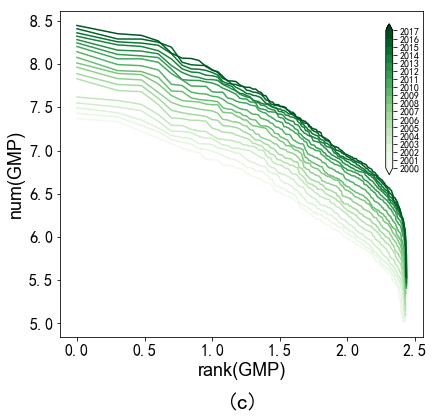

In [28]:
#### Amount 均值
fig=plt.figure(figsize=(6.5,6))
###设置颜色
cm2 = list(sns.color_palette("Greens", 18))###蓝色

# plt.figure(figsize=(27,14))
# plt.subplot(231)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_T1 = logZipfM(data,gdp,'GMP',i)
    plt.plot(YT_T1[0],YT_T1[1],color=cm2[i])
# plt.text(-0.2, 1.3, 'slope = {}'.format("%.2f" % nh_A[0]),size=16)
plt.xlabel('rank(GMP)',font2)
plt.ylabel('num(GMP)',font2)
plt.text(1.1,4,'(c)',fontsize=22)
cmap = mpl.cm.Greens###画颜色条
ax1 = fig.add_axes([0.82, 0.5, 0.015, 0.35]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_ec(logzipfGMP).pdf', bbox_inches='tight')

plt.savefig('E:/0论文/2picture/4_1c.png',dpi=500, bbox_inches='tight')

In [17]:
###########最小二乘拟合########3
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def picNH11(Yt1,Yt2,num):
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        elif Yt1[i]<num:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)


D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide b

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide b

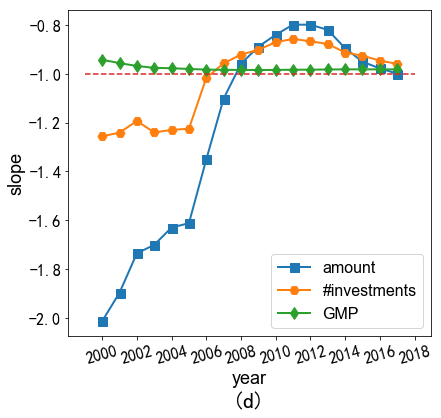

In [43]:
#### 查看2000-2017年zipf拟合结果
from matplotlib.ticker import FuncFormatter   ### 今天的主角
fig=plt.figure(figsize=(6.5,6))
ax1=fig.add_subplot(111)
# plt.figure(figsize=(8,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
nhA=[]####保存17年间的拟合结果
nhT=[]
nhG=[]
x=np.arange(2000,2018)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 16,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = logZipfM(data,investment,'amount',i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    if i<6:
        nhA.append(picNH11(zip_Ax,zip_Ay,1.4)[0])
    else:
        nhA.append(picNH11(zip_Ax,zip_Ay,1.9)[0])
    
    YT_T=logZipfM(data,inv_times,'times',i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    if i<6:
        nhT.append(picNH11(zip_Tx,zip_Ty,1.0)[0])
    else:
        nhT.append(picNH11(zip_Tx,zip_Ty,1.5)[0])
    
    YT_G=logZipfM(data,gdp,'GMP',i)
    zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
    zip_Gy.extend(YT_G[1])
    nhG.append(picNH11(zip_Gx,zip_Gy,2.3)[0])
xmajorLocator = MultipleLocator(2)
xminorLocator = MultipleLocator(1.0)###设置刻度
x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xticks(rotation=15)
plt.plot(x,nhA,linewidth=2,label='amount',marker='s',markersize=9)
plt.plot(x,nhT,linewidth=2,label='#investments',marker='H',markersize=9)
plt.plot(x,nhG,linewidth=2,label='GMP',marker='d',markersize=9)
plt.xlabel('year',font2)
plt.ylabel('slope',font2)
plt.plot(np.arange(1999,2019),[-1]*(len(x)+2),'--')
plt.legend(prop=font1)
plt.text(2007.5,-2.37,'(d)',fontsize=22)
plt.savefig('E:/0论文/2picture/4_1d.png',dpi=500, bbox_inches='tight')
# plt.savefig('E:/vcdata/pic/picSC/Fig5_d(zipfSlope原始).pdf', bbox_inches='tight')

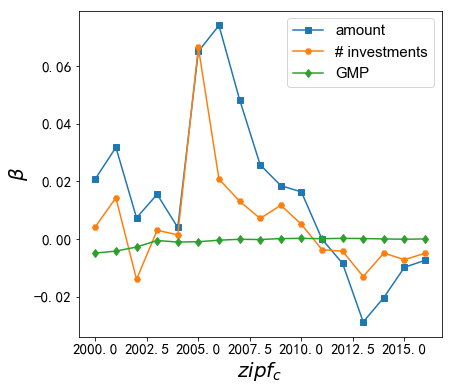

In [128]:
##############################################
########查看zipf变化情况 #####################
deltaAzipf = []
deltaTzipf = []
deltaGzipf = []
for i in range(len(nhA)-1):
    deltaAzipf.append(pow(2,nhA[i+1])-pow(2,nhA[i]))
    deltaTzipf.append(pow(2,nhT[i+1])-pow(2,nhT[i]))
    deltaGzipf.append(pow(2,nhG[i+1])-pow(2,nhG[i]))
# for i in range(len(nhA)-1):
#     if nhA[i+1]>-1:
#         deltaAzipf.append(pow(1,nhA[i+1])/pow(2,nhA[i+1])-pow(1,nhA[i])/pow(2,nhA[i]))
#     else:
#         deltaAzipf.append(-pow(1,nhA[i+1])/pow(2,nhA[i+1])+pow(1,nhA[i])/pow(2,nhA[i]))

# for i in range(len(nhT)-1):
#     if nhT[i+1]>-1:
#         deltaTzipf.append(pow(1,nhT[i+1])/pow(2,nhT[i+1])-pow(1,nhT[i])/pow(2,nhT[i]))
#     else:
#         deltaTzipf.append(-pow(1,nhT[i+1])/pow(2,nhT[i+1])+pow(1,nhT[i])/pow(2,nhT[i]))
        
# for i in range(len(nhG)-1):
#     if nhG[i+1]>-1:
#         deltaGzipf.append(pow(1,nhG[i+1])/pow(2,nhG[i+1])-pow(1,nhG[i])/pow(2,nhG[i]))
#     else:
#         deltaGzipf.append(-pow(1,nhG[i+1])/pow(2,nhG[i+1])+pow(1,nhG[i])/pow(2,nhG[i]))
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.plot(year,deltaAzipf,label='amount',marker='s')
plt.plot(year,deltaTzipf,label='# investments',marker='H')
plt.plot(year,deltaGzipf,label='GMP',marker='d')
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
# plt.axhline(y=1, color='black', linestyle='-')
# plt.axvline(x=1, color='black', linestyle='-')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

In [129]:
deltaAzipf

[0.0208525485830236,
 0.031789176407094,
 0.0073655782912584455,
 0.015502120438772582,
 0.004005191305389066,
 0.06504520951536097,
 0.07405382226420693,
 0.04837142702809494,
 0.02574826740812819,
 0.018532438581771338,
 0.016338842255390063,
 -3.393250629979416e-05,
 -0.008468708972840688,
 -0.028751358199896604,
 -0.020275026372583937,
 -0.009784840503478165,
 -0.007386626203194191]

In [123]:
dfzipf = pd.read_excel('E:/vcdata/pic/picSC/zipfClass11.xlsx')
dfNH = pd.read_excel('E:/vcdata/pic/picSC/betaK.xlsx')#####记录按照质心拟合和城市标度律
dfzipfO = pd.read_excel('E:/vcdata/pic/picSC/zipflogorigalClass2.xlsx')
zipfAmount = dfzipf['zipfAmount']
zipfTimes = dfzipf['zipfTimes']
zipfGMP = dfzipf['zipfGMP']
zipfAmountOR = dfzipfO['nhA']
zipfTimesOR = dfzipfO['nhT']
zipfGMPOR = dfzipfO['nhG']
belt_A = dfNH['belt_A']
belt_T = dfNH['belt_T']
belt_G = dfNH['belt_G']
ALL_A = dfNH['ALL_A']
ALL_T = dfNH['ALL_T']
ALL_G = dfNH['ALL_G']
Dbelt_A = [belt_A[i+1]-belt_A[i] for i in range(len(belt_A)-1)]
Dbelt_T = [belt_T[i+1]-belt_T[i] for i in range(len(belt_T)-1)]
Dbelt_G = [belt_G[i+1]-belt_G[i] for i in range(len(belt_G)-1)]
DALL_A = [ALL_A[i+1]-ALL_A[i] for i in range(len(ALL_A)-1)]
DALL_T = [ALL_T[i+1]-ALL_T[i] for i in range(len(ALL_T)-1)]
DALL_G = [ALL_G[i+1]-ALL_G[i] for i in range(len(ALL_G)-1)]

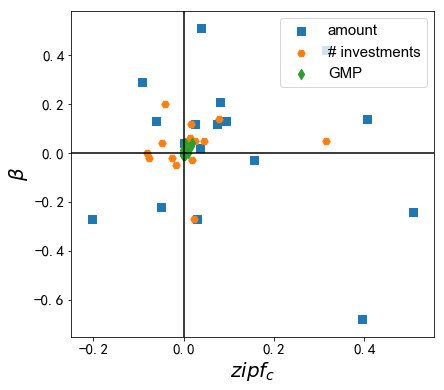

In [124]:
### 正确的 查看所有城市相邻两年标度率的变化 和 所有城市相邻两年的均值之差得到的标度率 
year=np.arange(2000,2017)
plt.figure(figsize=(6.5,6))
plt.scatter(deltaAzipf,DALL_A,label='amount',marker='s',s=55)
plt.scatter(deltaTzipf,DALL_T,label='# investments',marker='H',s=55)
plt.scatter(deltaGzipf,DALL_G,label='GMP',marker='d',s=55)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 15,
    }
plt.tick_params(labelsize=15) #刻度字体大小13
plt.xlabel('$zipf_c$',font2)
plt.ylabel('$β$',font2)
plt.legend(prop=font1)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
# plt.plot([0,1,2],[0,1,2],color='black',linestyle='--')
# plt.savefig('E:/vcdata/pic/picSC/Fig4_d.pdf', bbox_inches='tight')#保存图片

In [102]:
pow(1,-0.8),pow(2,-0.8),pow(2,-0.8)/pow(1,-0.8),pow(3,-0.8)/pow(1,-0.8)

(1.0, 0.5743491774985174, 0.5743491774985174, 0.41524364653850576)

In [55]:
################ 将两年都有值得数据找出来 ##########

In [73]:
####取log后的数据
def logZipfM(data,name1,cname,i):###横轴为排名，纵轴为投资金额或投资次数
    data1=data.fillna(0)
    inv=data1[name1[i]].values###得到投资金额或投资次数对的排名
    city=data['City'].drop_duplicates().values
    cp=dict(zip(city,inv))###dic(city,money/times)
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = False)
    y=[]
    x=[]
    cityName=[]
    for i in range(len(city)):
        if np.log10(cpSortList[i][1]) > 0:
            y.append(np.log10(cpSortList[i][1]))
            x.append(np.log10(i))
            cityName.append(city[i])
    return(x,y)

In [62]:
def picNH3(Yt1,Yt2):###主要是GDP要用
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        else:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
D:\Use

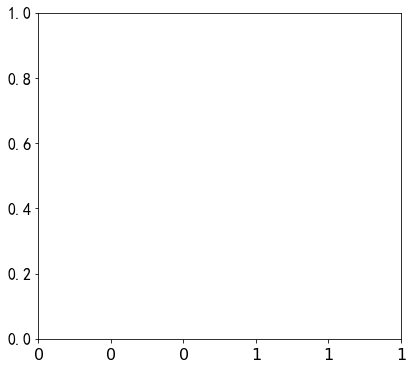

In [70]:
from matplotlib.ticker import FuncFormatter   ### 今天的主角
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % x
fig=plt.figure(figsize=(6.5,6))
ax1=fig.add_subplot(111)
formatter = FuncFormatter(formatnum)
ax1.xaxis.set_major_formatter(formatter)
# plt.figure(figsize=(8,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
nhA=[]####保存17年间的拟合结果
nhT=[]
nhG=[]
x=np.arange(2000,2018)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 16,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = logZipfM(data,investment,'amount',i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    nhA.append(picNH3(zip_Ax,zip_Ay)[0])

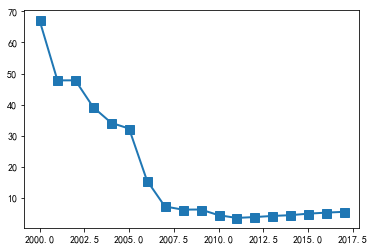

In [71]:
plt.plot(x,nhA,linewidth=2,label='amount',marker='s',markersize=9)

In [72]:
nhA

[67.11180003388405,
 47.794363984598895,
 47.81704970783565,
 39.16374605832646,
 34.181995069560045,
 32.316242698938886,
 15.634252066189404,
 7.317218194091306,
 6.283911182137252,
 6.331925146277092,
 4.516073828475496,
 3.6304489001557743,
 3.89878056928265,
 4.261490478227518,
 4.5033812093818835,
 4.99394320017548,
 5.32801992220491,
 5.59033101662622]

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


TypeError: Improper input: N=2 must not exceed M=0

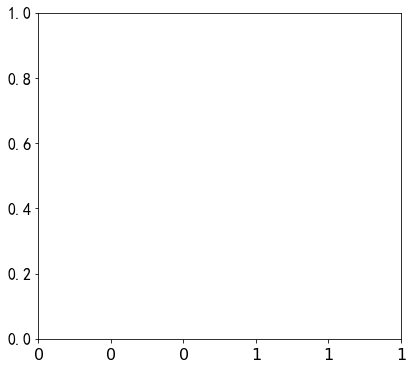

In [63]:
#### 查看2000-2017年zipf拟合结果
from matplotlib.ticker import FuncFormatter   ### 今天的主角
def formatnum(x, pos):
#     return x//10000
    return '$%.0f$' % x
fig=plt.figure(figsize=(6.5,6))
ax1=fig.add_subplot(111)
formatter = FuncFormatter(formatnum)
ax1.xaxis.set_major_formatter(formatter)
# plt.figure(figsize=(8,6))
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
nhA=[]####保存17年间的拟合结果
nhT=[]
nhG=[]
x=np.arange(2000,2018)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
font1 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 16,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = logZipfM(data,investment,'amount',i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    if i<6:
        nhA.append(picNH11(zip_Ax,zip_Ay,1.4)[0])
    else:
        nhA.append(picNH11(zip_Ax,zip_Ay,1.9)[0])
    
    YT_T=logZipfM(data,inv_times,'times',i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    if i<6:
        nhT.append(picNH11(zip_Tx,zip_Ty,1.0)[0])
    else:
        nhT.append(picNH11(zip_Tx,zip_Ty,1.5)[0])
    
    YT_G=logZipfM(data,gdp,'GMP',i)
    zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
    zip_Gy.extend(YT_G[1])
    nhG.append(picNH11(zip_Gx,zip_Gy,2.3)[0])
plt.plot(x,nhA,linewidth=2,label='amount',marker='s',markersize=9)
plt.plot(x,nhT,linewidth=2,label='#investments',marker='H',markersize=9)
plt.plot(x,nhG,linewidth=2,label='GMP',marker='d',markersize=9)
plt.xlabel('year',font2)
plt.ylabel('slope',font2)
plt.legend(prop=font1)
# plt.savefig('E:/vcdata/pic/picSC/Fig5_d(zipfSlope原始).pdf', bbox_inches='tight')

In [53]:
df = pd.DataFrame()
df['nhA']=nhA
df['nhT']=nhT
df['nhG']=nhG

In [40]:
df.to_excel('E:/vcdata/pic/picSC/zipflogorigalClass.xlsx')

In [54]:
df.to_excel('E:/vcdata/pic/picSC/zipflogorigalClass2.xlsx')

In [56]:
df

,nhA,nhT,nhG
0,-2.014606,-1.255928,-0.942295
1,-1.897897,-1.241294,-0.955856
2,-1.736372,-1.193344,-0.967579
3,-1.701393,-1.240213,-0.975391
4,-1.630433,-1.229924,-0.976865
5,-1.612653,-1.224963,-0.979817
6,-1.350921,-1.016522,-0.982431
7,-1.101303,-0.957033,-0.983560
8,-0.958850,-0.920684,-0.983773
9,-0.888394,-0.901354,-0.984261
